In [20]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "gse283509"

In [21]:
# List files inside the specific directory (replace 'gse283509' with the correct folder name)
list.files("/kaggle/input/gse283509/")

[1] "GSM8664467_L21.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"
[2] "GSM8664468_L22.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"
[3] "GSM8664469_L23.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"
[4] "GSM8664470_L24.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"
[5] "GSM8664471_L25.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"
[6] "GSM8664472_L26.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"
[7] "GSM8664473_L27.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"
[8] "GSM8664474_L28.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts.txt"

In [22]:
# Set the directory where your files are located (Kaggle input directory)
data_dir <- "/kaggle/input/gse283509/"

# List all the files in the directory
txt_files <- list.files(data_dir, pattern = "*.txt", full.names = TRUE)

# Initialize an empty list to store the data frames
count_data_list <- list()

# Load each file and store it in the list
for (file in txt_files) {
  count_data <- read.table(file, header = FALSE, sep = "\t")
  count_data_list[[file]] <- count_data
}

# Check the first file to see the structure
head(count_data_list[[1]])

# Assuming the first column contains the gene names and the second column contains the counts
# Create a count matrix
count_matrix <- do.call(cbind, lapply(count_data_list, function(x) x$V2))

# Set gene names as rownames
rownames(count_matrix) <- count_data_list[[1]]$V1

# Set sample names as column names
colnames(count_matrix) <- gsub(".*/(.*)\\.txt", "\\1", txt_files)  # Extract sample names from file names

# Check the dimensions of the count matrix
dim(count_matrix)

# View the first few rows of the count matrix
head(count_matrix)

,V1,V2
,<chr>,<int>
1,ChrSy.fgenesh.gene.1,0
2,ChrSy.fgenesh.gene.10,0
3,ChrSy.fgenesh.gene.11,0
4,ChrSy.fgenesh.gene.12,0
5,ChrSy.fgenesh.gene.13,0
6,ChrSy.fgenesh.gene.14,0


[1] 55991     8

,GSM8664467_L21.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,GSM8664468_L22.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,GSM8664469_L23.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,GSM8664470_L24.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,GSM8664471_L25.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,GSM8664472_L26.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,GSM8664473_L27.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,GSM8664474_L28.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts
ChrSy.fgenesh.gene.1,0,0,0,0,0,0,0,0
ChrSy.fgenesh.gene.10,0,0,0,0,0,0,0,0
ChrSy.fgenesh.gene.11,0,0,0,0,0,0,0,0
ChrSy.fgenesh.gene.12,0,0,0,0,0,0,0,0
ChrSy.fgenesh.gene.13,0,0,0,0,0,0,0,0
ChrSy.fgenesh.gene.14,0,0,0,0,0,0,0,0


In [23]:
# Install Bioconductor's package manager if it's not already installed
if (!requireNamespace("BiocManager", quietly = TRUE)) {
  install.packages("BiocManager")
}

# Install DESeq2 using Bioconductor
BiocManager::install("DESeq2")

# Load the DESeq2 library
library(DESeq2)

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: http://cran.rstudio.com/

Bioconductor version 3.19 (BiocManager 1.30.23), R 4.4.0 (2024-04-24)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'DESeq2'”
Old packages: 'abind', 'adehabitatHR', 'adehabitatLT', 'adehabitatMA',
  'admisc', 'AER', 'afex', 'AID', 'AlgDesign', 'AlphaSimR', 'amap', 'Amelia',
  'antiword', 'anytime', 'apollo', 'aqp', 'arrow', 'ars', 'arules', 'askpass',
  'ASMap', 'automap', 'BAS', 'base64', 'bayestestR', 'bbotk', 'BDgraph',
  'beepr', 'betareg', 'bigD', 'bigstatsr', 'billboarder', 'bindr',
  'BiocManager', 'bit', 'bit64', 'bitops', 'blme', 'blorr', 'BMA', 'bnlearn',
  'bonsai', 'bookdown', 'boot', 'brms', 'broom', 'broom.helpers',
  'broom.mixed', 'bslib', 'bundle', 'car', 'caret', 'caretEnsemble', 'caTools',
  'cba

In [26]:
# Define col_data (metadata for samples)
col_data <- data.frame(
  condition = factor(c("Condition1", "Condition1", "Condition2", "Condition2", 
                       "Condition3", "Condition3", "Condition4", "Condition4")),
  row.names = colnames(count_matrix)  # Sample names from the count matrix
)

# Make sure the 'condition' is a factor
col_data$condition <- factor(col_data$condition, levels = c("Condition1", "Condition2", "Condition3", "Condition4"))


In [27]:
# Check if col_data is created successfully
head(col_data)

,condition
,<fct>
GSM8664467_L21.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,Condition1
GSM8664468_L22.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,Condition1
GSM8664469_L23.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,Condition2
GSM8664470_L24.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,Condition2
GSM8664471_L25.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,Condition3
GSM8664472_L26.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts,Condition3


In [28]:
# Create DESeqDataSet from count matrix and metadata
dds <- DESeqDataSetFromMatrix(countData = count_matrix, 
                              colData = col_data, 
                              design = ~condition)


In [29]:
dds

class: DESeqDataSet 
dim: 55991 8 
metadata(1): version
assays(1): counts
rownames(55991): ChrSy.fgenesh.gene.1 ChrSy.fgenesh.gene.10 ...
  __not_aligned __alignment_not_unique
rowData names(0):
colnames(8):
  GSM8664467_L21.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts
  GSM8664468_L22.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts
  ...
  GSM8664473_L27.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts
  GSM8664474_L28.fastq_processed.fastqAligned.out.sam.bamsorted.bam_dedup.bam_counts
colData names(1): condition

In [30]:
# Check the dimensions of count_matrix and col_data
dim(count_matrix)  # should match the number of samples in col_data
dim(col_data)      # should have one row per sample (same number as columns in count_matrix)


[1] 55991     8

[1] 8 1

In [31]:
# Run DESeq2 analysis
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [32]:
# Obtain the results
res <- results(dds)


In [33]:
# View summary of results
summary(res)


out of 25259 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 1892, 7.5%
LFC < 0 (down)     : 1301, 5.2%
outliers [1]       : 0, 0%
low counts [2]     : 11459, 45%
(mean count < 4)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



Total genes with non-zero read count:


25259 genes have at least some read count across all samples.

Adjusted p-value < 0.1:

This shows how many genes pass the threshold of an adjusted p-value < 0.1, which is often used to define significance in RNA-Seq studies. It helps to reduce false positives by adjusting for multiple comparisons.

Log2 Fold Change (LFC) > 0 (upregulated):

1892 genes are upregulated in one of the conditions compared to the others. This means the gene expression is higher in this condition compared to the baseline condition.
7.5% of the genes have a positive log2 fold change, indicating they are upregulated.

Log2 Fold Change (LFC) < 0 (downregulated):

1301 genes are downregulated in the comparison (expression is lower in the condition relative to the baseline).
5.2% of genes have a negative log2 fold change, indicating they are downregulated.

Outliers:

There are 0 outlier genes detected, meaning that no gene was found to have expression patterns that were extreme compared to the rest of the data. This is a good sign, suggesting that the data is fairly consistent.
Low counts:

11459 genes have a mean count less than 4 across all samples. These genes are considered to have low expression and might not provide enough statistical power for differential expression analysis.
45% of genes in your dataset have low counts, so they are less reliable for identifying differential expression.


In [37]:

# Filter low-count genes ( removing genes with mean counts < 10)
keep <- rowMeans(counts(dds)) >= 10
dds <- dds[keep,]

# independent filtering: DESeq2 uses an independent filtering approach to filter genes based on low counts
res <- results(dds, independentFiltering = TRUE)


In [36]:
# adjusting outliers
res <- results(dds, cooksCutoff = TRUE)


In [38]:
# View the top results
head(res)


log2 fold change (MLE): condition Condition4 vs Condition1 
Wald test p-value: condition Condition4 vs Condition1 
DataFrame with 6 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat    pvalue      padj
               <numeric>      <numeric> <numeric> <numeric> <numeric> <numeric>
LOC_Os01g01010   7.32766       -3.52217  1.527647  -2.30562 0.0211319 0.0922555
LOC_Os01g01030   3.31198       -2.14616  1.672965  -1.28285 0.1995449        NA
LOC_Os01g01040  38.71137       -1.10072  0.565289  -1.94718 0.0515135 0.1727065
LOC_Os01g01050   3.81272       -2.83368  1.580974  -1.79236 0.0730748        NA
LOC_Os01g01060 246.03895        0.64717  0.343249   1.88542 0.0593726 0.1897945
LOC_Os01g01070   8.21695       -3.68610  1.503985  -2.45089 0.0142503 0.0696924

In [39]:
# Filter for significant genes
sig_genes <- res[which(res$padj < 0.1), ]
head(sig_genes)


log2 fold change (MLE): condition Condition4 vs Condition1 
Wald test p-value: condition Condition4 vs Condition1 
DataFrame with 6 rows and 6 columns
                baseMean log2FoldChange     lfcSE      stat      pvalue
               <numeric>      <numeric> <numeric> <numeric>   <numeric>
LOC_Os01g01010   7.32766      -3.522174  1.527647  -2.30562 0.021131867
LOC_Os01g01070   8.21695      -3.686102  1.503985  -2.45089 0.014250344
LOC_Os01g01295  22.14645       1.705864  0.531438   3.20990 0.001327790
LOC_Os01g01307 122.16154      -1.006202  0.415925  -2.41919 0.015554970
LOC_Os01g01450 282.49752      -0.770537  0.226979  -3.39475 0.000686911
LOC_Os01g01520  13.59751      -4.216974  1.509248  -2.79409 0.005204611
                    padj
               <numeric>
LOC_Os01g01010 0.0922555
LOC_Os01g01070 0.0696924
LOC_Os01g01295 0.0101752
LOC_Os01g01307 0.0745566
LOC_Os01g01450 0.0058049
LOC_Os01g01520 0.0314526

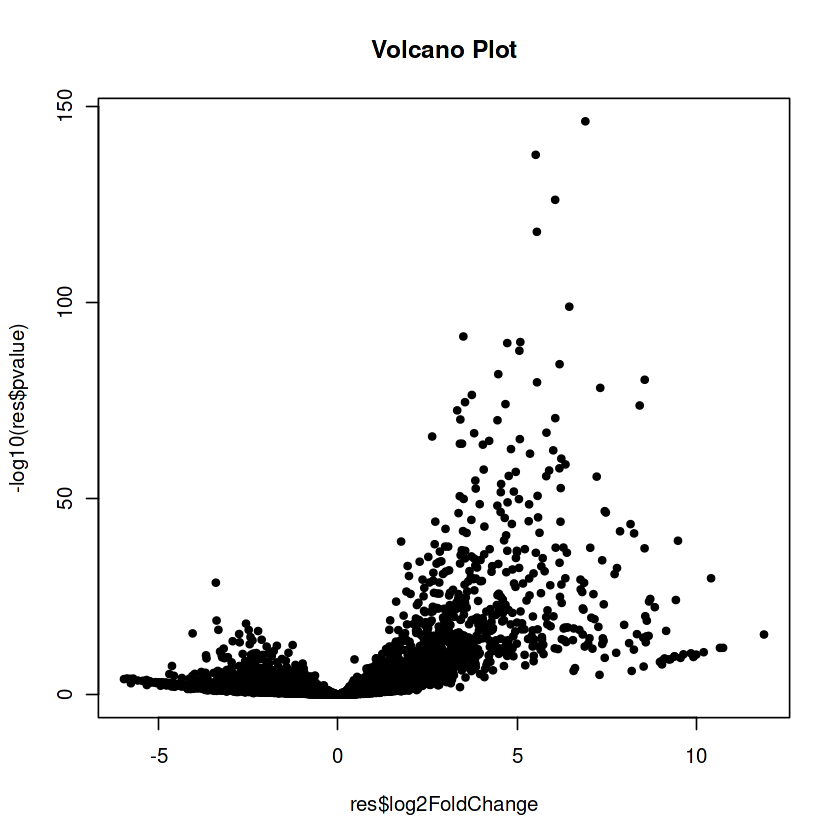

In [40]:
# Volcano plot for log2 fold change vs. p-value
plot(res$log2FoldChange, -log10(res$pvalue), pch = 20, main = "Volcano Plot")


Warning message:
“Removed 603 rows containing missing values or values outside the scale range
(`geom_point()`).”


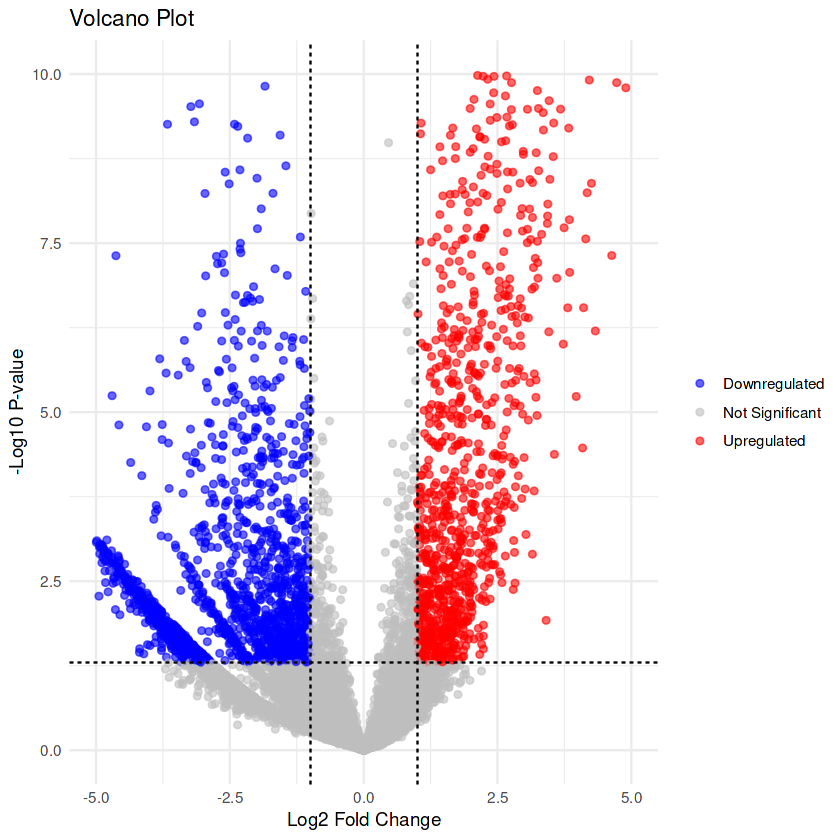

In [42]:
# Set thresholds for p-value and log2 fold change (you can adjust these values)
pval_threshold <- 0.05  # Adjust as needed
lfc_threshold <- 1      # Adjust as needed

# Create a new column in the results data frame to categorize the genes
res$significance <- "Not Significant"
res$significance[which(res$pvalue < pval_threshold & res$log2FoldChange > lfc_threshold)] <- "Upregulated"
res$significance[which(res$pvalue < pval_threshold & res$log2FoldChange < -lfc_threshold)] <- "Downregulated"

# Plot the volcano plot with color coding
library(ggplot2)

ggplot(res, aes(x = log2FoldChange, y = -log10(pvalue), color = significance)) +
  geom_point(alpha = 0.6) +  # Use points with some transparency
  scale_color_manual(values = c("Not Significant" = "gray", "Upregulated" = "red", "Downregulated" = "blue")) +
  xlim(c(-5, 5)) +  # Adjust as per your data
  ylim(c(0, 10)) +  # Adjust as per your data
  geom_vline(xintercept = c(-lfc_threshold, lfc_threshold), linetype = "dashed", color = "black") +  # Log2FC threshold
  geom_hline(yintercept = -log10(pval_threshold), linetype = "dashed", color = "black") +  # P-value threshold
  labs(title = "Volcano Plot", x = "Log2 Fold Change", y = "-Log10 P-value") +
  theme_minimal() +
  theme(legend.title = element_blank())
